In [1]:
# prediction of septic_shock patients admitted in ICU (Intensive critical care unit.)

Sepsis is a serious condition in which the body responds improperly to an infection. 
The infection-fighting processes turn on the body, causing the organs to work poorly.
Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that 
can damage the lungs, kidneys, liver and other organs. When the damage is severe, 
it can lead to mortality.

Sepsis can progress to septic shock when certain changes in the circulatory system, 
the body's cells and how the body uses energy become more abnormal. Septic shock is 
more likely to cause death than sepsis is.

Sepsis is a clinical syndrome of life-threatening organ dysfunction caused by a 
dysregulated response to infection. In septic shock, there is critical reduction in 
tissue perfusion; acute failure of multiple organs, including the lungs, kidneys, 
and liver, can occur.

In [2]:
# Goal is to predict septic_shock situation..(one of the major issue associated with ICU)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns",200)

In [4]:
data=pd.read_csv("sepsis_status.csv")
data.head()

encounter_id  patient_id  hospital_id  septic_shock   age    bmi  \
0         66154       25312          118             0  68.0  22.73   
1        114252       59342           81             0  77.0  27.42   
2        119783       50777          118             0  25.0  31.95   
3         79267       46918          118             0  81.0  22.64   
4         92056       34377           33             0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache  urineoutpu

In [5]:
dictionary=pd.read_csv("Parameter _detail_Dictionary.csv")

In [6]:
dictionary.head()

Category  Variable Name Unit of Measure Data Type  \
0   identifier   encounter_id            None   integer   
1   identifier    hospital_id            None   integer   
2   identifier     patient_id            None   integer   
3  demographic  Sepsis_status            None    binary   
4  demographic            age           Years   numeric   

                                         Description Example  
0  Unique identifier associated with a patient un...    None  
1       Unique identifier associated with a hospital    None  
2        Unique identifier associated with a patient    None  
3  Whether the patient having sepsis during this ...       0  
4           The age of the patient on unit admission    None

In [7]:
dictionary.Category.value_counts()

labs                         60
vitals                       52
APACHE covariate             28
demographic                  16
labs blood gas               16
APACHE comorbidity            8
identifier                    3
APACHE prediction             2
APACHE grouping               2
GOSSIS example prediction     1
Name: Category, dtype: int64

In [8]:
def selectcategory(df,category):
    return df[df.Category==category]


In [9]:
cols=selectcategory(dictionary,"GOSSIS example prediction")
cols

Category Variable Name Unit of Measure Data Type  \
187  GOSSIS example prediction          pred            None   numeric   

                                           Description   Example  
187  Example mortality prediction, shared as a 'bas...  0.000921

In [10]:
cols=selectcategory(dictionary,"APACHE grouping")
cols

Category         Variable Name Unit of Measure Data Type  \
185  APACHE grouping  apache_3j_bodysystem            None    string   
186  APACHE grouping   apache_2_bodysystem            None    string   

                                  Description         Example  
185  Admission diagnosis group for APACHE III  Cardiovascular  
186   Admission diagnosis group for APACHE II     Respiratory

In [11]:
cols=selectcategory(dictionary,"demographic")
cols

Category          Variable Name     Unit of Measure Data Type  \
3   demographic          Sepsis_status                None    binary   
4   demographic                    age               Years   numeric   
5   demographic                    bmi  kilograms/metres^2    string   
6   demographic       elective_surgery                None    binary   
7   demographic              ethnicity                None    string   
8   demographic                 gender                None    string   
9   demographic                 height         centimetres   numeric   
10  demographic  hospital_admit_source                None    string   
11  demographic       icu_admit_source                None    string   
12  demographic         icu_admit_type                None    string   
13  demographic                 icu_id                None   integer   
14  demographic          icu_stay_type                None    string   
15  demographic               icu_type                None    string   
16  demographic       pre_icu_los_days                Days   numeric   
17  demographic     readmission_status                None    binary   
18  demographic                 weight           kilograms   numeric   

                                          Description           Example  
3   Whether the patient having sepsis during this ...                 0  
4            The age of the patient on unit admission              None  
5   The body mass index of the person on unit admi...              21.5  
6   Whether the patient was admitted to the hospit...                 0  
7   The common national or cultural tradition whic...         Caucasian  
8                  The genotypical sex of the patient                 F  
9          The height of the person on unit admission               180  
10  The location of the patient prior to being adm...              Home  
11  The location of the patient prior to being adm...    Operating room  
12         The type of unit admission for the patient    Cardiothoracic  
13  A unique identifier for the unit to which the ...              None  
14                                                NaN              None  
15  A classification which indicates the type of c...  Neurological ICU  
16  The length of stay of the patient between hosp...               3.5  
17  Whether the current unit stay is the second (o...                 0  
18  The weight (body mass) of the person on unit a...                80

In [12]:
icu_df=data.copy()

In [13]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [14]:
# here septic_shock is the target variable 

In [15]:
icu_df["septic_shock"].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: septic_shock, dtype: float64

In [16]:
icu_df.head()

encounter_id  patient_id  hospital_id  septic_shock   age    bmi  \
0         66154       25312          118             0  68.0  22.73   
1        114252       59342           81             0  77.0  27.42   
2        119783       50777          118             0  25.0  31.95   
3         79267       46918          118             0  81.0  22.64   
4         92056       34377           33             0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache  urineoutpu

In [17]:
# missing value
icu_df.isnull().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
septic_shock                          0
age                                4228
bmi                                3429
elective_surgery                      0
ethnicity                          1395
gender                               25
height                             1334
hospital_admit_source             21409
icu_admit_source                    112
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             2720
albumin_apache                    54379
apache_2_diagnosis                 1662
apache_3j_diagnosis                1101
apache_post_operative                 0
arf_apache                          715
bilirubin_apache                  58134
bun_apache                        19262


In [18]:
high_null=icu_df.isnull().sum().sort_values(ascending=False)/len(icu_df)

In [19]:
high_null

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

In [20]:
# here there are two major category --- more than 50 % missing value and less than 25% missing value

In [21]:
# lets find the more than 50% missing vlaue columns and drop them

In [22]:
high_missing=high_null[high_null>=0.50].index
high_missing

Index(['h1_bilirubin_min', 'h1_bilirubin_max', 'h1_lactate_max',
       'h1_lactate_min', 'h1_albumin_max', 'h1_albumin_min',
       'h1_pao2fio2ratio_min', 'h1_pao2fio2ratio_max', 'h1_arterial_ph_max',
       'h1_arterial_ph_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_arterial_pco2_min', 'h1_arterial_pco2_max', 'h1_wbc_max',
       'h1_wbc_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_calcium_max', 'h1_calcium_min', 'h1_platelets_max',
       'h1_platelets_min', 'h1_bun_max', 'h1_bun_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_diasbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_mbp_invasive_min',
       'h1_mbp_invasive_max', 'h1_hematocrit_max', 'h1_hematocrit_min',
       'h1_hemaglobin_min', 'h1_hemaglobin_max', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_max', 'h1_potassium_min', 'pao2_apache',
       'ph_apache', 'paco2_for_ph_apache', 'paco2_apache', 'fio2_apache',
       'd1_l

In [23]:
len(high_missing)

74

In [24]:
# lets drop these columns
icu=icu_df.drop(high_missing,axis=1)


In [25]:
icu_df.shape


(91713, 186)

In [26]:
icu.shape

(91713, 112)

In [27]:
icu.isnull().any().sum()

101

In [28]:
icu.isnull().any(axis=1).sum()

63918

In [29]:
# we are dropping all rows having any misisng value
# we are not using any imputation approach here because it is a critical care patient dataset

In [30]:
df1=icu.dropna()

In [31]:
df1.shape

(27795, 112)

In [32]:
df1.isnull().sum().sum()

0

In [33]:
df1.head()

encounter_id  patient_id  hospital_id  septic_shock   age        bmi  \
0          66154       25312          118             0  68.0  22.730000   
1         114252       59342           81             0  77.0  27.420000   
5          33181       74489           83             0  67.0  27.560000   
17         22471      112115          118             0  46.0  25.845717   
23         95460      120539          118             0  87.0  21.963763   

    elective_surgery  ethnicity gender  height hospital_admit_source  \
0                  0  Caucasian      M   180.3                 Floor   
1                  0  Caucasian      F   160.0                 Floor   
5                  0  Caucasian      M   190.5          Direct Admit   
17                 0   Hispanic      M   167.6  Emergency Department   
23                 0  Caucasian      M   180.3                 Floor   

        icu_admit_source  icu_id icu_stay_type      icu_type  \
0                  Floor      92         admit         CTICU   
1                  Floor      90         admit  Med-Surg ICU   
5   Accident & Emergency      95         admit  Med-Surg ICU   
17  Accident & Emergency      92         admit         CTICU   
23                 Floor      97         admit          MICU   

    pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  \
0           0.541667                   0    73.9               113.0   
1           0.927778                   0    70.2               108.0   
5           0.000694                   0   100.0               301.0   
17          0.000000                   0    72.6               108.0   
23          5.046528                   0    71.4               113.0   

    apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0                502.01                      0         0.0        31.0   
1                203.01                      0         0.0         9.0   
5                403.01                      0         0.0        13.0   
17               203.01                      0         0.0        15.0   
23               501.05                      0         0.0        13.0   

    creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                2.51              3.0               6.0                0.0   
1                0.56              1.0               3.0                0.0   
5                0.71              4.0               6.0                0.0   
17               1.00              1.0               4.0                0.0   
23               0.94              3.0               6.0                0.0   

    gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0                 4.0           168.0              118.0               27.4   
1                 1.0           145.0              120.0               36.9   
5                 5.0           156.0              113.0               44.2   
17                1.0           143.0              114.0               44.2   
23                1.0           105.0               99.0               28.9   

    intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0                0.0        40.0             36.0          134.0         39.3   
1                0.0        46.0             33.0          145.0         35.1   
5                0.0       130.0             35.0          137.0         36.6   
17               1.0       113.0             34.0          132.0         36.4   
23               0.0       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_dias

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 24.0+ MB


In [ ]:
# lets drop some insignificant columns like id  as per basic understanding

In [35]:
cols_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]

In [36]:
df1=df1.drop(cols_to_drop,axis=1)
df1.shape

(27795, 106)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


In [ ]:
# one hot encoding approach --- for object to numerical conversion

In [39]:
object_columns=df1.select_dtypes(include="object").columns

In [40]:
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [41]:
df1_final=pd.get_dummies(df1,columns=object_columns,drop_first=True)
df1_final.head()

hospital_id  septic_shock   age        bmi  elective_surgery  height  \
0           118             0  68.0  22.730000                 0   180.3   
1            81             0  77.0  27.420000                 0   160.0   
5            83             0  67.0  27.560000                 0   190.5   
17          118             0  46.0  25.845717                 0   167.6   
23          118             0  87.0  21.963763                 0   180.3   

    pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  \
0           0.541667                   0    73.9               113.0   
1           0.927778                   0    70.2               108.0   
5           0.000694                   0   100.0               301.0   
17          0.000000                   0    72.6               108.0   
23          5.046528                   0    71.4               113.0   

    apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0                502.01                      0         0.0        31.0   
1                203.01                      0         0.0         9.0   
5                403.01                      0         0.0        13.0   
17               203.01                      0         0.0        15.0   
23               501.05                      0         0.0        13.0   

    creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                2.51              3.0               6.0                0.0   
1                0.56              1.0               3.0                0.0   
5                0.71              4.0               6.0                0.0   
17               1.00              1.0               4.0                0.0   
23               0.94              3.0               6.0                0.0   

    gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0                 4.0           168.0              118.0               27.4   
1                 1.0           145.0              120.0               36.9   
5                 5.0           156.0              113.0               44.2   
17                1.0           143.0              114.0               44.2   
23                1.0           105.0               99.0               28.9   

    intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0                0.0        40.0             36.0          134.0         39.3   
1                0.0        46.0             33.0          145.0         35.1   
5                0.0       130.0             35.0          137.0         36.6   
17               1.0       113.0             34.0          132.0         36.4   
23               0.0       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0                        68.0                       37.0             119.0   
1                        95.0                       31.0             118.0   
5                       100.0                       61.0             113.0   
17                       89.0                       61.0              98.0   
23                       88.0                       65.0             116.0   

    d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0               72.0        89.0        46.0                    89.0   
1               72.0       120.0        38.0                   120.0   
5               83.0       127.0        80.0                   127.0   
17              64.0       113.0        76.0                   113.0   


In [42]:
df1_final.shape

(27795, 133)

In [43]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 133 entries, hospital_id to apache_2_bodysystem_Undefined diagnoses
dtypes: float64(96), int64(5), uint8(32)
memory usage: 22.5 MB


In [ ]:
# split X & Y independent and dependent variable

In [44]:
X=df1_final.drop("septic_shock",axis=1)
Y=df1_final["septic_shock"]

In [46]:
Y.value_counts(normalize=True)

0    0.908761
1    0.091239
Name: septic_shock, dtype: float64

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 132 entries, hospital_id to apache_2_bodysystem_Undefined diagnoses
dtypes: float64(96), int64(4), uint8(32)
memory usage: 22.3 MB


In [48]:
X.head()

hospital_id   age        bmi  elective_surgery  height  pre_icu_los_days  \
0           118  68.0  22.730000                 0   180.3          0.541667   
1            81  77.0  27.420000                 0   160.0          0.927778   
5            83  67.0  27.560000                 0   190.5          0.000694   
17          118  46.0  25.845717                 0   167.6          0.000000   
23          118  87.0  21.963763                 0   180.3          5.046528   

    readmission_status  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                    0    73.9               113.0               502.01   
1                    0    70.2               108.0               203.01   
5                    0   100.0               301.0               403.01   
17                   0    72.6               108.0               203.01   
23                   0    71.4               113.0               501.05   

    apache_post_operative  arf_apache  bun_apache  creatinine_apache  \
0                       0         0.0        31.0               2.51   
1                       0         0.0         9.0               0.56   
5                       0         0.0        13.0               0.71   
17                      0         0.0        15.0               1.00   
23                      0         0.0        13.0               0.94   

    gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0               3.0               6.0                0.0                4.0   
1               1.0               3.0                0.0                1.0   
5               4.0               6.0                0.0                5.0   
17              1.0               4.0                0.0                1.0   
23              3.0               6.0                0.0                1.0   

    glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0            168.0              118.0               27.4               0.0   
1            145.0              120.0               36.9               0.0   
5            156.0              113.0               44.2               0.0   
17           143.0              114.0               44.2               1.0   
23           105.0               99.0               28.9               0.0   

    map_apache  resprate_apache  sodium_apache  temp_apache  \
0         40.0             36.0          134.0         39.3   
1         46.0             33.0          145.0         35.1   
5        130.0             35.0          137.0         36.6   
17       113.0             34.0          132.0         36.4   
23       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0                        68.0                       37.0             119.0   
1                        95.0                       31.0             118.0   
5                       100.0                       61.0             113.0   
17                       89.0                       61.0              98.0   
23                       88.0                       65.0             116.0   

    d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0               72.0        89.0        46.0                    89.0   
1               72.0       120.0        38.0                   120.0   
5               83.0       127.0        80.0                   127.0   
17              64.0       113.0        76.0                   113.0   
23              74.0       123.0        90.0                   123.0   

    d1_mbp_

In [ ]:
# learning ---perpose

In [50]:
X1=X.copy()

In [ ]:
# understanding the concept of feature importance, zero variance

In [ ]:
# variance threshold--- to find zero variance column

In [49]:
from sklearn.feature_selection import VarianceThreshold

In [54]:
sel=VarianceThreshold(threshold=0.05)
sel.fit(X1)

VarianceThreshold(threshold=0.05)

In [55]:
sum(sel.get_support())

104

In [ ]:
# select the best significant columns

In [56]:
from sklearn.feature_selection import SelectKBest,chi2

In [57]:
X2=SelectKBest(chi2,k=20).fit_transform(X1,Y)

ValueError: Input X must be non-negative.

In [ ]:
# here value error is X must be Non Negative-- to solve this scale -- Min Max approach

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scale=MinMaxScaler()
X1_scaled=scale.fit_transform(X1)
X1_scaled=pd.DataFrame(X1_scaled,columns=X1.columns)

In [67]:
X1_scaled.head()

hospital_id       age       bmi  elective_surgery    height  \
0     0.574257  0.712329  0.148859               0.0  0.738140   
1     0.391089  0.835616  0.237400               0.0  0.390478   
2     0.400990  0.698630  0.240043               0.0  0.912828   
3     0.574257  0.410959  0.207679               0.0  0.520637   
4     0.574257  0.972603  0.134394               0.0  0.738140   

   pre_icu_los_days  readmission_status    weight  apache_2_diagnosis  \
0          0.011390                 0.0  0.239484            0.057971   
1          0.017132                 0.0  0.214383            0.033816   
2          0.003346                 0.0  0.416554            0.966184   
3          0.003336                 0.0  0.230665            0.033816   
4          0.078379                 0.0  0.222524            0.057971   

   apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0             0.190949                    0.0         0.0    0.219512   
1             0.048571                    0.0         0.0    0.040650   
2             0.143807                    0.0         0.0    0.073171   
3             0.048571                    0.0         0.0    0.089431   
4             0.190492                    0.0         0.0    0.073171   

   creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0           0.203125         0.666667               1.0                0.0   
1           0.023897         0.000000               0.4                0.0   
2           0.037684         1.000000               1.0                0.0   
3           0.064338         0.000000               0.6                0.0   
4           0.058824         0.666667               1.0                0.0   

   gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0               0.75        0.230481           0.594595           0.318182   
1               0.00        0.189387           0.608108           0.588068   
2               1.00        0.209041           0.560811           0.795455   
3               0.00        0.185814           0.567568           0.795455   
4               0.00        0.117920           0.466216           0.360795   

   intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0               0.0     0.00000         0.571429       0.414634     0.947368   
1               0.0     0.03750         0.517857       0.682927     0.394737   
2               0.0     0.56250         0.553571       0.487805     0.592105   
3               1.0     0.45625         0.535714       0.365854     0.565789   
4               0.0     0.58125         0.517857       0.707317     0.552632   

   ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                0.0    0.293987       0.184874       0.311688   
1                1.0    0.262806       0.411765       0.233766   
2                0.0    0.222717       0.453782       0.623377   
3                1.0    0.195991       0.361345       0.623377   
4                1.0    0.200445       0.352941       0.675325   

   d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0                   0.184874                   0.311688          0.512605   
1                   0.411765                   0.233766          0.504202   
2                   0.453782                   0.623377          0.462185   
3                   0.361345                   0.623377          0.336134   
4                   0.352941                   0.675325          0.487395   

   d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0          0.503497    0.233871    0.266667                0.239669   
1          0.503497    0.483871    0.177778                0.495868   
2          0.580420    0.540323    0.644444                0.553719   
3          0.447552    0.427419    0.600000                0.438017   
4          0.517483    0.508065    0.755556                0.520661   

   d1_mbp_noninvasive_

In [69]:
bestfeatures=SelectKBest(chi2,k=20).fit(X1_scaled,Y)

In [70]:
bestfeatures

SelectKBest(k=20, score_func=<function chi2 at 0x000002ABEC476B90>)

In [71]:
bestfeatures.scores_

array([1.42862506e-01, 2.17849336e+01, 1.11978894e+00, 1.86707219e+02,
       1.21622087e-01, 7.21004255e+00,            nan, 1.67263126e+00,
       8.35419891e+01, 5.09776111e+01, 1.53533326e+02, 2.80394540e+01,
       1.54980817e+02, 7.63328267e+01, 2.53527568e+02, 1.79947418e+02,
                  nan, 3.64633662e+02, 1.74600431e+01, 3.16254335e+01,
       1.11431491e+01, 9.60682716e+02, 4.70298618e+00, 5.45769292e+01,
       3.93749501e-03, 1.69600550e+01, 9.30856147e+02, 5.48225662e+01,
       3.74099671e-01, 4.66350520e+01, 3.52846065e-01, 4.63887825e+01,
       5.50147916e+01, 3.09755664e-01, 1.15434928e-02, 5.57979705e+01,
       6.61876682e-05, 5.53454046e+01, 2.70460269e+01, 2.20532196e+00,
       2.89125390e-05, 1.22381575e+01, 7.66713747e-01, 6.62358395e+01,
       8.08092820e-01, 6.59977133e+01, 1.62339870e+00, 2.99400068e+01,
       1.24999324e+00, 2.46683533e+01, 1.25219767e+00, 2.46158383e+01,
       2.46220055e+01, 1.47399102e+01, 4.78073251e+00, 3.00714733e+01,
      

In [72]:
dfscores=pd.DataFrame(bestfeatures.scores_)

In [73]:
dfscores

0
0      0.142863
1     21.784934
2      1.119789
3    186.707219
4      0.121622
5      7.210043
6           NaN
7      1.672631
8     83.541989
9     50.977611
10   153.533326
11    28.039454
12   154.980817
13    76.332827
14   253.527568
15   179.947418
16          NaN
17   364.633662
18    17.460043
19    31.625433
20    11.143149
21   960.682716
22     4.702986
23    54.576929
24     0.003937
25    16.960055
26   930.856147
27    54.822566
28     0.374100
29    46.635052
30     0.352846
31    46.388782
32    55.014792
33     0.309756
34     0.011543
35    55.797970
36     0.000066
37    55.345405
38    27.046027
39     2.205322
40     0.000029
41    12.238158
42     0.766714
43    66.235839
44     0.808093
45    65.997713
46     1.623399
47    29.940007
48     1.249993
49    24.668353
50     1.252198
51    24.615838
52    24.622005
53    14.739910
54     4.780733
55    30.071473
56     4.950505
57    30.253404
58    34.898325
59     6.031725
60     0.045187
61     1.300702
62     7.624402
63    35.687386
64     7.534216
65    35.314658
66     8.529792
67     9.986614
68   160.106655
69   142.461617
70     8.311449
71    25.801638
72    79.964912
73    61.769455
74    30.914075
75     0.023325
76    25.417841
77    39.438300
78     7.559891
79    18.911300
80     3.676085
81    13.291518
82     2.221691
83     8.821899
84    24.699552
85     0.086093
86     2.857848
87     0.560944
88    56.981422
89    34.949179
90    86.384798
91    63.266896
92     0.481910
93    69.730858
94     0.364922
95    64.151773
96    37.919915
97    20.091743
98     6.719506
99    63.433407
100    0.001369
101    0.446835
102    0.749712
103    3.981508
104    1.116739
105    0.127198
106   11.969236
107    7.217347
108    4.137821
109   37.835929
110    0.171924
111    0.376154
112    6.723426
113   12.336456
114    5.974675
115    8.356753
116    0.985842
117  129.486077
118    9.507561
119    1.219865
120   17.780424
121  242.951287
122   15.266541
123   12.336456
124    0.985842
125  129.486077
126    1.219865
127   10.647314
128   17.780424
129   15.266541
130    0.800997
131   73.415239

In [74]:
dfcolumns=pd.DataFrame(X1.columns)

In [ ]:
# concat two dataframe for better visualization

In [75]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores

0           0
0                                  hospital_id    0.142863
1                                          age   21.784934
2                                          bmi    1.119789
3                             elective_surgery  186.707219
4                                       height    0.121622
5                             pre_icu_los_days    7.210043
6                           readmission_status         NaN
7                                       weight    1.672631
8                           apache_2_diagnosis   83.541989
9                          apache_3j_diagnosis   50.977611
10                       apache_post_operative  153.533326
11                                  arf_apache   28.039454
12                                  bun_apache  154.980817
13                           creatinine_apache   76.332827
14                             gcs_eyes_apache  253.527568
15                            gcs_motor_apache  179.947418
16                           gcs_unable_apache         NaN
17                           gcs_verbal_apache  364.633662
18                              glucose_apache   17.460043
19                           heart_rate_apache   31.625433
20                           hematocrit_apache   11.143149
21                            intubated_apache  960.682716
22                                  map_apache    4.702986
23                             resprate_apache   54.576929
24                               sodium_apache    0.003937
25                                 temp_apache   16.960055
26                           ventilated_apache  930.856147
27                                  wbc_apache   54.822566
28                               d1_diasbp_max    0.374100
29                               d1_diasbp_min   46.635052
30                   d1_diasbp_noninvasive_max    0.352846
31                   d1_diasbp_noninvasive_min   46.388782
32                            d1_heartrate_max   55.014792
33                            d1_heartrate_min    0.309756
34                                  d1_mbp_max    0.011543
35                                  d1_mbp_min   55.797970
36                      d1_mbp_noninvasive_max    0.000066
37                      d1_mbp_noninvasive_min   55.345405
38                             d1_resprate_max   27.046027
39                             d1_resprate_min    2.205322
40                                 d1_spo2_max    0.000029
41                                 d1_spo2_min   12.238158
42                                d1_sysbp_max    0.766714
43                                d1_sysbp_min   66.235839
44                    d1_sysbp_noninvasive_max    0.808093
45                    d1_sysbp_noninvasive_min   65.997713
46                                 d1_temp_max    1.623399
47                                 d1_temp_min   29.940007
48                               h1_diasbp_max    1.249993
49                               h1_diasbp_min   24.668353
50                   h1_diasbp_noninvasive_max    1.252198
51                   h1_diasbp_noninvasive_min   24.615838
52                            h1_heartrate_max   24.622005
53                            h1_heartrate_min   14.739910
54                                  h1_mbp_max    4.780733
55                                  h1_mbp_min   30.071473
56                      h1_mbp_noninvasive_max    4.950505
57                      h1_mbp_noninvasive_min   30.253404
58                             h1_resprate_max   34.898325
59                             h1_resprate_min    6.031725
60                                 h1_spo2_max    0.045187
61                                 h1_spo2_min    1.300702
62                                h1_sysbp_max    7.624402
63                                h1_sysbp_min   35.687386
64                    h1_sysbp_noninvasive_max    7.534216
65                    h1_sysbp_noninvasive_min   35.314658
66                                 h1_temp_max    8.529792
67                               

In [76]:
featurescores.columns=["Features","score"]
featurescores

Features       score
0                                  hospital_id    0.142863
1                                          age   21.784934
2                                          bmi    1.119789
3                             elective_surgery  186.707219
4                                       height    0.121622
5                             pre_icu_los_days    7.210043
6                           readmission_status         NaN
7                                       weight    1.672631
8                           apache_2_diagnosis   83.541989
9                          apache_3j_diagnosis   50.977611
10                       apache_post_operative  153.533326
11                                  arf_apache   28.039454
12                                  bun_apache  154.980817
13                           creatinine_apache   76.332827
14                             gcs_eyes_apache  253.527568
15                            gcs_motor_apache  179.947418
16                           gcs_unable_apache         NaN
17                           gcs_verbal_apache  364.633662
18                              glucose_apache   17.460043
19                           heart_rate_apache   31.625433
20                           hematocrit_apache   11.143149
21                            intubated_apache  960.682716
22                                  map_apache    4.702986
23                             resprate_apache   54.576929
24                               sodium_apache    0.003937
25                                 temp_apache   16.960055
26                           ventilated_apache  930.856147
27                                  wbc_apache   54.822566
28                               d1_diasbp_max    0.374100
29                               d1_diasbp_min   46.635052
30                   d1_diasbp_noninvasive_max    0.352846
31                   d1_diasbp_noninvasive_min   46.388782
32                            d1_heartrate_max   55.014792
33                            d1_heartrate_min    0.309756
34                                  d1_mbp_max    0.011543
35                                  d1_mbp_min   55.797970
36                      d1_mbp_noninvasive_max    0.000066
37                      d1_mbp_noninvasive_min   55.345405
38                             d1_resprate_max   27.046027
39                             d1_resprate_min    2.205322
40                                 d1_spo2_max    0.000029
41                                 d1_spo2_min   12.238158
42                                d1_sysbp_max    0.766714
43                                d1_sysbp_min   66.235839
44                    d1_sysbp_noninvasive_max    0.808093
45                    d1_sysbp_noninvasive_min   65.997713
46                                 d1_temp_max    1.623399
47                                 d1_temp_min   29.940007
48                               h1_diasbp_max    1.249993
49                               h1_diasbp_min   24.668353
50                   h1_diasbp_noninvasive_max    1.252198
51                   h1_diasbp_noninvasive_min   24.615838
52                            h1_heartrate_max   24.622005
53                            h1_heartrate_min   14.739910
54                                  h1_mbp_max    4.780733
55                                  h1_mbp_min   30.071473
56                      h1_mbp_noninvasive_max    4.950505
57                      h1_mbp_noninvasive_min   30.253404
58                             h1_resprate_max   34.898325
59                             h1_resprate_min    6.031725
60                                 h1_spo2_max    0.045187
61                                 h1_spo2_min    1.300702
62                                h1_sysbp_max    7.624402
63                                h1_sysbp_min   35.687386
64                    h1_sysbp_noninvasive_max    7.534216
65                    h1_sysbp_noninvasive_min   35.314658
66                                 h1_temp_max    8.529792
67                        

In [77]:
featurescores.nlargest(20,"score")

Features       score
21                          intubated_apache  960.682716
26                         ventilated_apache  930.856147
17                         gcs_verbal_apache  364.633662
14                           gcs_eyes_apache  253.527568
121              apache_3j_bodysystem_Sepsis  242.951287
3                           elective_surgery  186.707219
15                          gcs_motor_apache  179.947418
68                                d1_bun_max  160.106655
12                                bun_apache  154.980817
10                     apache_post_operative  153.533326
69                                d1_bun_min  142.461617
117           apache_3j_bodysystem_Metabolic  129.486077
125            apache_2_bodysystem_Metabolic  129.486077
90            apache_4a_hospital_sepsis_prob   86.384798
8                         apache_2_diagnosis   83.541989
72                         d1_creatinine_max   79.964912
13                         creatinine_apache   76.332827
131  apache_2_bodysystem_Undefined diagnoses   73.415239
93                                 cirrhosis   69.730858
43                              d1_sysbp_min   66.235839

In [ ]:
# dt.feature_importances_
#rf.feature_importances_
# SelectFromModel
#RFECV-Recursive Feature elimination cross validation -- is very effective 

# continue the project

In [78]:
# finding unique variable columns
one_unique=X.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [79]:
const_cols=one_unique[one_unique==1].index
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [80]:
X["readmission_status"].value_counts()

0    27795
Name: readmission_status, dtype: int64

In [81]:
X.drop(['readmission_status', 'gcs_unable_apache'],axis=1,inplace=True)

In [82]:
X.shape

(27795, 130)

In [83]:
corr_matrix=X.corr(method="spearman").abs()
corr_matrix

hospital_id       age       bmi  \
hospital_id                                   1.000000  0.023046  0.014703   
age                                           0.023046  1.000000  0.102192   
bmi                                           0.014703  0.102192  1.000000   
elective_surgery                              0.049647  0.054517  0.028267   
height                                        0.033495  0.123064  0.012171   
pre_icu_los_days                              0.000866  0.090182  0.009129   
weight                                        0.027434  0.148448  0.880394   
apache_2_diagnosis                            0.005550  0.035333  0.008191   
apache_3j_diagnosis                           0.017585  0.088868  0.033975   
apache_post_operative                         0.047964  0.045835  0.030399   
arf_apache                                    0.000385  0.019419  0.004010   
bun_apache                                    0.008449  0.341147  0.081152   
creatinine_apache                             0.013198  0.206540  0.155061   
gcs_eyes_apache                               0.026168  0.042142  0.020329   
gcs_motor_apache                              0.013921  0.035899  0.039773   
gcs_verbal_apache                             0.009046  0.021180  0.053836   
glucose_apache                                0.007863  0.045058  0.150083   
heart_rate_apache                             0.001770  0.161223  0.042985   
hematocrit_apache                             0.000898  0.121132  0.117249   
intubated_apache                              0.016270  0.008750  0.036228   
map_apache                                    0.012759  0.076555  0.053504   
resprate_apache                               0.054585  0.031430  0.002553   
sodium_apache                                 0.003439  0.042749  0.021054   
temp_apache                                   0.059842  0.113531  0.037492   
ventilated_apache                             0.034473  0.006724  0.069622   
wbc_apache                                    0.019394  0.011917  0.054315   
d1_diasbp_max                                 0.012832  0.073898  0.054502   
d1_diasbp_min                                 0.015559  0.251466  0.008948   
d1_diasbp_noninvasive_max                     0.012855  0.073416  0.054250   
d1_diasbp_noninvasive_min                     0.015755  0.251180  0.009203   
d1_heartrate_max                              0.019620  0.154576  0.043471   
d1_heartrate_min                              0.014032  0.151041  0.011664   
d1_mbp_max                                    0.005818  0.014250  0.072978   
d1_mbp_min                                    0.030437  0.172263  0.020790   
d1_mbp_noninvasive_max                        0.006060  0.014217  0.072847   
d1_mbp_noninvasive_min                        0.030315  0.172481  0.020615   
d1_resprate_max                               0.014507  0.031633  0.022875   
d1_resprate_min                               0.083630  0.051329  0.000331   
d1_spo2_max                                   0.025829  0.029938  0.124595   
d1_spo2_min                                   0.033792  0.113899  0.088231   
d1_sysbp_max                                  0.009972  0.104631  0.095507   
d1_sysbp_min                                  0.029607  0.075637  0.059089   
d1_sysbp_noninvasive_max                      0.009554  0.104315  0.095253   
d1_sysbp_noninvasive_min                      0.029469  0.075678  0.058879   
d1_temp_max                                   0.034897  0.097403  0.019230   
d1_temp_min                                   0.080696  0.116708  0.036794   
h1_diasbp_max                                 0.019332  0.168123  0.032363   
h1_diasbp_min                                 0.025912  0.216529  0.001410   
h1_diasbp_noninvasive_max                     0.019883  0.166813  0.030786   
h1_diasbp_noninvasive_min                     0.022735  0.216744  0.000757   
h1_heartrate_max                              0.004763  0.178289 

<Axes: >

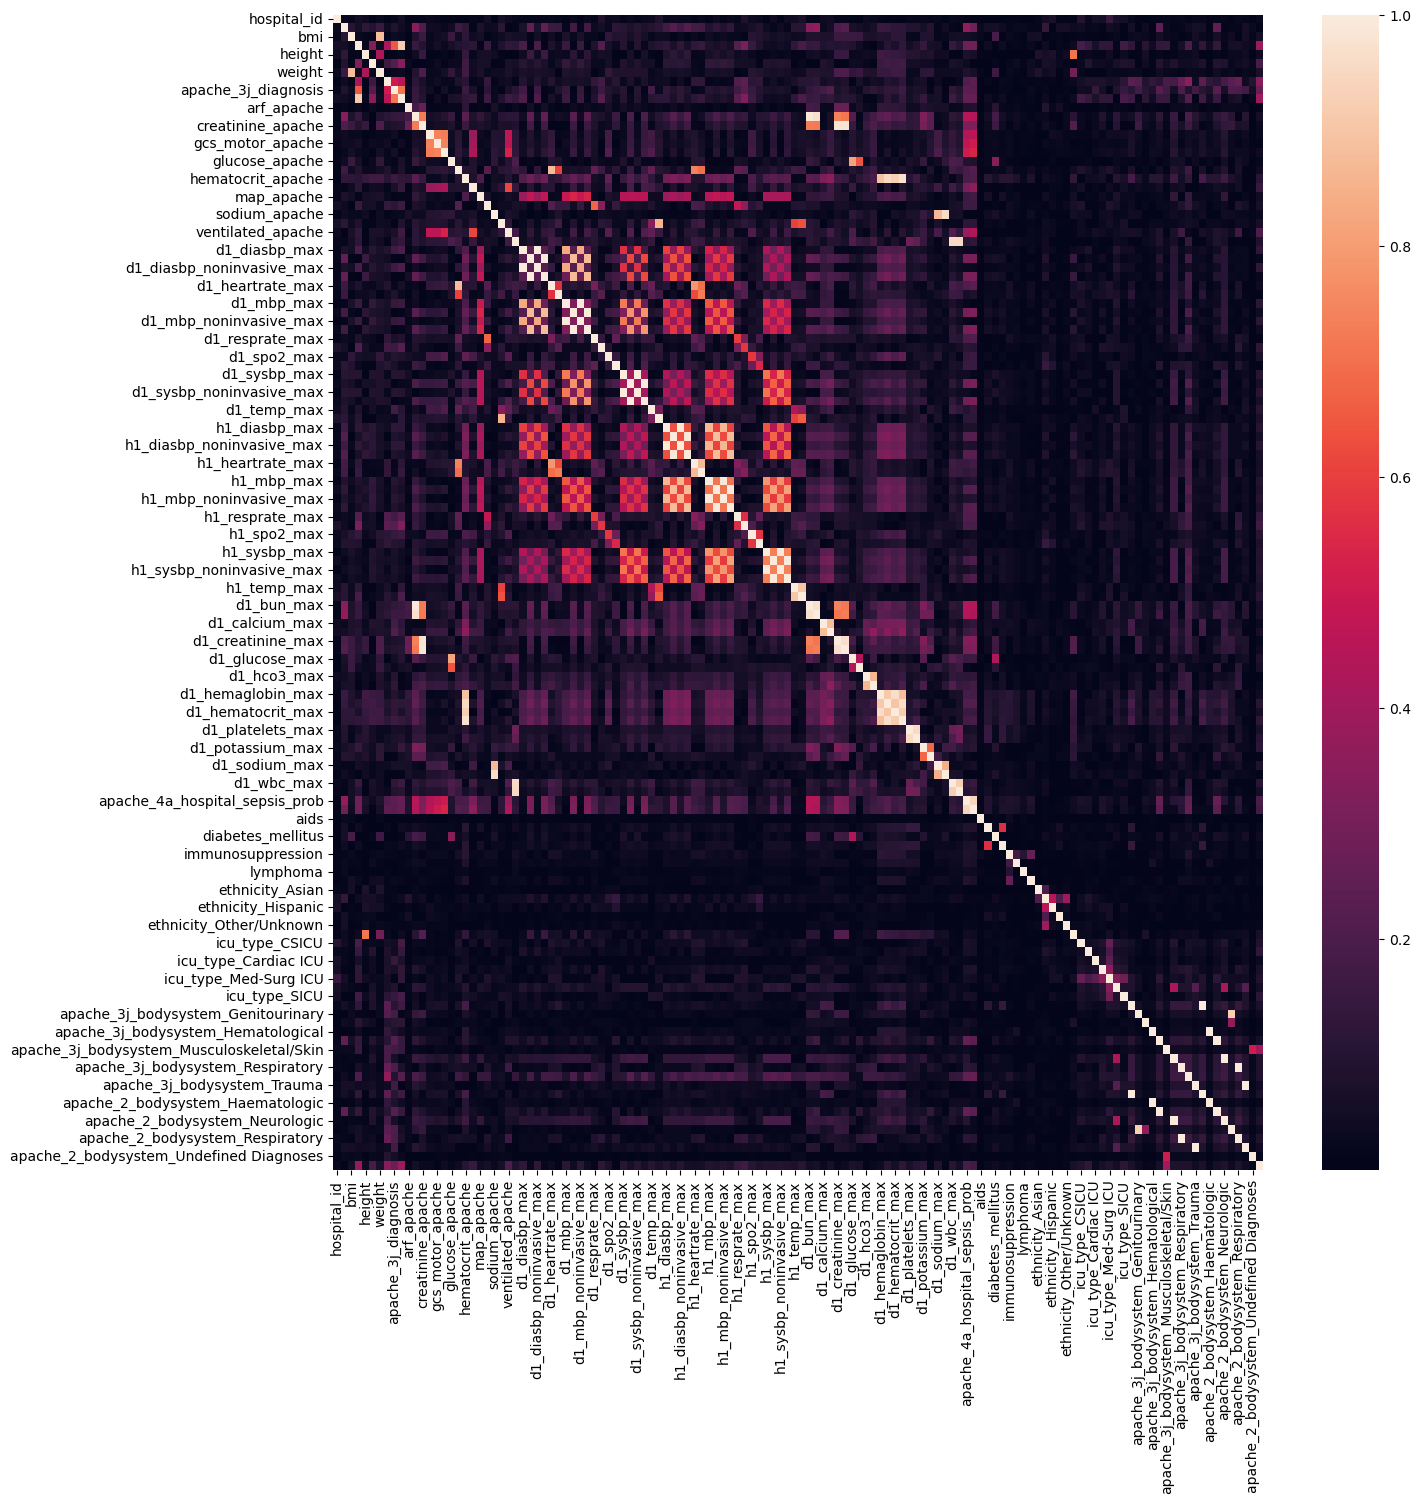

In [85]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)

In [86]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [87]:
upper

hospital_id       age       bmi  \
hospital_id                                        NaN  0.023046  0.014703   
age                                                NaN       NaN  0.102192   
bmi                                                NaN       NaN       NaN   
elective_surgery                                   NaN       NaN       NaN   
height                                             NaN       NaN       NaN   
pre_icu_los_days                                   NaN       NaN       NaN   
weight                                             NaN       NaN       NaN   
apache_2_diagnosis                                 NaN       NaN       NaN   
apache_3j_diagnosis                                NaN       NaN       NaN   
apache_post_operative                              NaN       NaN       NaN   
arf_apache                                         NaN       NaN       NaN   
bun_apache                                         NaN       NaN       NaN   
creatinine_apache                                  NaN       NaN       NaN   
gcs_eyes_apache                                    NaN       NaN       NaN   
gcs_motor_apache                                   NaN       NaN       NaN   
gcs_verbal_apache                                  NaN       NaN       NaN   
glucose_apache                                     NaN       NaN       NaN   
heart_rate_apache                                  NaN       NaN       NaN   
hematocrit_apache                                  NaN       NaN       NaN   
intubated_apache                                   NaN       NaN       NaN   
map_apache                                         NaN       NaN       NaN   
resprate_apache                                    NaN       NaN       NaN   
sodium_apache                                      NaN       NaN       NaN   
temp_apache                                        NaN       NaN       NaN   
ventilated_apache                                  NaN       NaN       NaN   
wbc_apache                                         NaN       NaN       NaN   
d1_diasbp_max                                      NaN       NaN       NaN   
d1_diasbp_min                                      NaN       NaN       NaN   
d1_diasbp_noninvasive_max                          NaN       NaN       NaN   
d1_diasbp_noninvasive_min                          NaN       NaN       NaN   
d1_heartrate_max                                   NaN       NaN       NaN   
d1_heartrate_min                                   NaN       NaN       NaN   
d1_mbp_max                                         NaN       NaN       NaN   
d1_mbp_min                                         NaN       NaN       NaN   
d1_mbp_noninvasive_max                             NaN       NaN       NaN   
d1_mbp_noninvasive_min                             NaN       NaN       NaN   
d1_resprate_max                                    NaN       NaN       NaN   
d1_resprate_min                                    NaN       NaN       NaN   
d1_spo2_max                                        NaN       NaN       NaN   
d1_spo2_min                                        NaN       NaN       NaN   
d1_sysbp_max                                       NaN       NaN       NaN   
d1_sysbp_min                                       NaN       NaN       NaN   
d1_sysbp_noninvasive_max                           NaN       NaN       NaN   
d1_sysbp_noninvasive_min                           NaN       NaN       NaN   
d1_temp_max                                        NaN       NaN       NaN   
d1_temp_min                                        NaN       NaN       NaN   
h1_diasbp_max                                      NaN       NaN       NaN   
h1_diasbp_min                                      NaN       NaN       NaN   
h1_diasbp_noninvasive_max                          NaN       NaN       NaN   
h1_diasbp_noninvasive_min                          NaN       NaN       NaN   
h1_heartrate_max                                   NaN       NaN 

<Axes: >

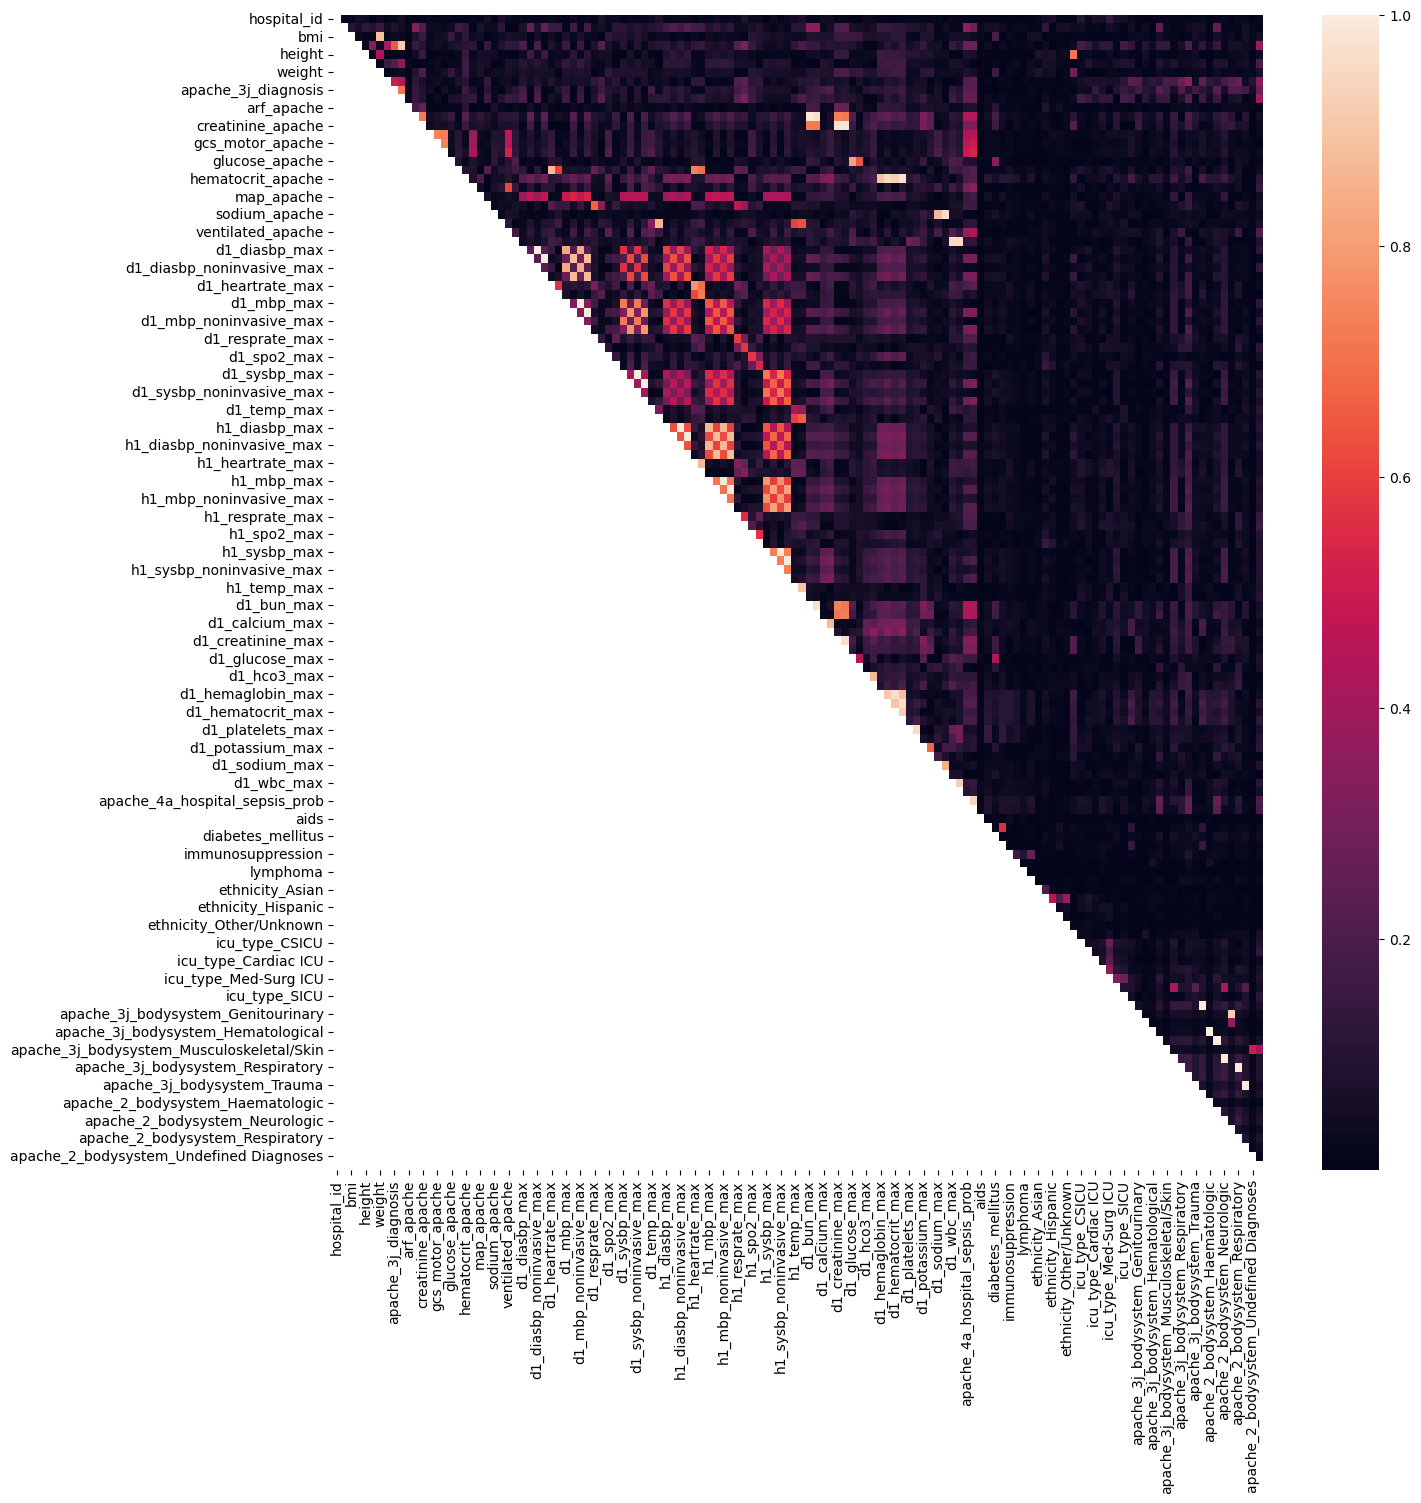

In [88]:
plt.figure(figsize=(15,15))
sns.heatmap(upper)

In [ ]:
# suppose our threshold is 0.9

In [95]:
high_cor_features=[col for col in upper.columns if any(upper[col]>=0.9)]

In [96]:
high_cor_features

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [97]:
len(high_cor_features)

32

In [98]:
X.shape

(27795, 130)

In [99]:
X_new=X.drop(high_cor_features,axis=1)

In [100]:
X_new.shape

(27795, 98)

In [101]:
X_new.head()

hospital_id   age        bmi  elective_surgery  height  pre_icu_los_days  \
0           118  68.0  22.730000                 0   180.3          0.541667   
1            81  77.0  27.420000                 0   160.0          0.927778   
5            83  67.0  27.560000                 0   190.5          0.000694   
17          118  46.0  25.845717                 0   167.6          0.000000   
23          118  87.0  21.963763                 0   180.3          5.046528   

    weight  apache_2_diagnosis  apache_3j_diagnosis  arf_apache  bun_apache  \
0     73.9               113.0               502.01         0.0        31.0   
1     70.2               108.0               203.01         0.0         9.0   
5    100.0               301.0               403.01         0.0        13.0   
17    72.6               108.0               203.01         0.0        15.0   
23    71.4               113.0               501.05         0.0        13.0   

    creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_verbal_apache  \
0                2.51              3.0               6.0                4.0   
1                0.56              1.0               3.0                1.0   
5                0.71              4.0               6.0                5.0   
17               1.00              1.0               4.0                1.0   
23               0.94              3.0               6.0                1.0   

    glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0            168.0              118.0               27.4               0.0   
1            145.0              120.0               36.9               0.0   
5            156.0              113.0               44.2               0.0   
17           143.0              114.0               44.2               1.0   
23           105.0               99.0               28.9               0.0   

    map_apache  resprate_apache  sodium_apache  temp_apache  \
0         40.0             36.0          134.0         39.3   
1         46.0             33.0          145.0         35.1   
5        130.0             35.0          137.0         36.6   
17       113.0             34.0          132.0         36.4   
23       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0              119.0              72.0        89.0        46.0   
1              118.0              72.0       120.0        38.0   
5              113.0              83.0       127.0        80.0   
17              98.0              64.0       113.0        76.0   
23             116.0              74.0       123.0        90.0   

    d1_resprate_max  d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_max  \
0              34.0             10.0        100.0         74.0         131.0   
1              32.0             12.0        100.0         70.0         159.0   
5              32.0             10.0         97.0         91.0         173.0   
17             22.0              9.0        100.0         88.0         169.0   
23             36.0             16.0        100.0         90.0         179.0   

    d1_sysbp_min  d1_temp_max  d1_temp_min  h1_diasbp_max  h1_diasbp_min  \
0           73.0         39.9         37.2           68.0           63.0   
1           67.0         36.3         35.1           61.0           48.0   
5          107.0         36.8         36.6           89.0           89.0   
17         102.0         37.1         36.4           89.0           63.0   
23         129.0         36.8         35.6           71.0       

In [ ]:
# Dependence plotting...show how a single input feature affects the predicted output.
#( while holding all other features constant)

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf=RandomForestClassifier()

In [104]:
from sklearn.inspection import PartialDependenceDisplay

In [105]:
model=rf.fit(X_new,Y)

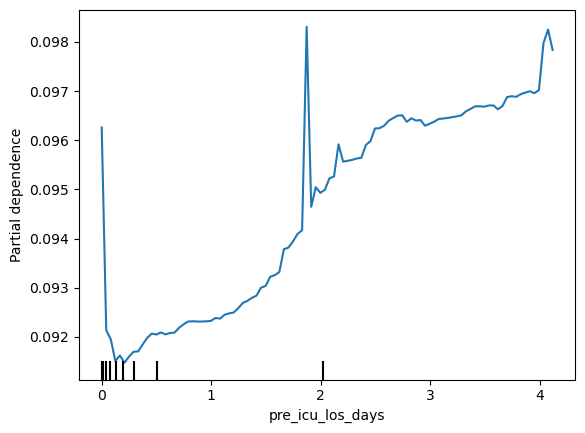

In [106]:
disp1=PartialDependenceDisplay.from_estimator(model,X_new,["pre_icu_los_days"])
plt.show()

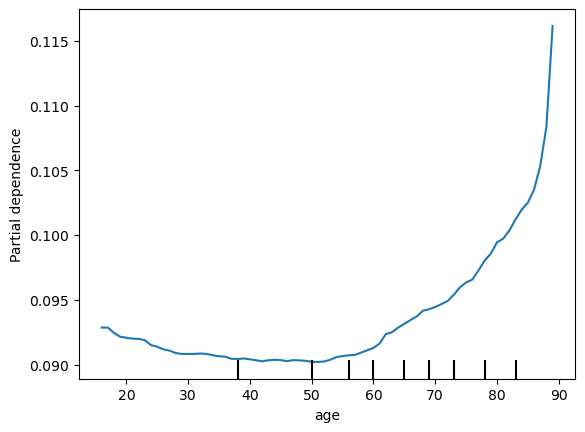

In [107]:
disp1=PartialDependenceDisplay.from_estimator(model,X_new,["age"])
plt.show()

#scaling the dataset
#split into train test
#apply the algorithm
#if required data balancing approach
#if required we can do hyper parameter tunning 
accuracy 90%.....we are hing 100 columns

#we can rebuilt the model with selected highly significant features
accuracy alomost cloase to 90% with a very small no. of features /columnsyes

In [108]:
scale=MinMaxScaler()
X_new_scaled=scale.fit_transform(X_new)
X_new_scaled=pd.DataFrame(X_new_scaled,columns=X_new.columns)

In [109]:
X_new_scaled.head()

hospital_id       age       bmi  elective_surgery    height  \
0     0.574257  0.712329  0.148859               0.0  0.738140   
1     0.391089  0.835616  0.237400               0.0  0.390478   
2     0.400990  0.698630  0.240043               0.0  0.912828   
3     0.574257  0.410959  0.207679               0.0  0.520637   
4     0.574257  0.972603  0.134394               0.0  0.738140   

   pre_icu_los_days    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0          0.011390  0.239484            0.057971             0.190949   
1          0.017132  0.214383            0.033816             0.048571   
2          0.003346  0.416554            0.966184             0.143807   
3          0.003336  0.230665            0.033816             0.048571   
4          0.078379  0.222524            0.057971             0.190492   

   arf_apache  bun_apache  creatinine_apache  gcs_eyes_apache  \
0         0.0    0.219512           0.203125         0.666667   
1         0.0    0.040650           0.023897         0.000000   
2         0.0    0.073171           0.037684         1.000000   
3         0.0    0.089431           0.064338         0.000000   
4         0.0    0.073171           0.058824         0.666667   

   gcs_motor_apache  gcs_verbal_apache  glucose_apache  heart_rate_apache  \
0               1.0               0.75        0.230481           0.594595   
1               0.4               0.00        0.189387           0.608108   
2               1.0               1.00        0.209041           0.560811   
3               0.6               0.00        0.185814           0.567568   
4               1.0               0.00        0.117920           0.466216   

   hematocrit_apache  intubated_apache  map_apache  resprate_apache  \
0           0.318182               0.0     0.00000         0.571429   
1           0.588068               0.0     0.03750         0.517857   
2           0.795455               0.0     0.56250         0.553571   
3           0.795455               1.0     0.45625         0.535714   
4           0.360795               0.0     0.58125         0.517857   

   sodium_apache  temp_apache  ventilated_apache  wbc_apache  d1_diasbp_max  \
0       0.414634     0.947368                0.0    0.293987       0.184874   
1       0.682927     0.394737                1.0    0.262806       0.411765   
2       0.487805     0.592105                0.0    0.222717       0.453782   
3       0.365854     0.565789                1.0    0.195991       0.361345   
4       0.707317     0.552632                1.0    0.200445       0.352941   

   d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0       0.311688          0.512605          0.503497    0.233871    0.266667   
1       0.233766          0.504202          0.503497    0.483871    0.177778   
2       0.623377          0.462185          0.580420    0.540323    0.644444   
3       0.623377          0.336134          0.447552    0.427419    0.600000   
4       0.675325          0.487395          0.517483    0.508065    0.755556   

   d1_resprate_max  d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_max  \
0         0.256410            0.250     1.000000         0.74      0.288732   
1         0.230769            0.300     1.000000         0.70      0.485915   
2         0.230769            0.250     0.965517         0.91      0.584507   
3         0.102564            0.225     1.000000         0.88      0.556338   
4         0.282051            0.400     1.000000         0.90      0.626761   

   d1_sysbp_min  d1_temp_max  d1_temp_min  h1_diasbp_max  h1_diasbp_min  \
0      0.268908     1.000000     0.898494       0.292453       0.450549   
1      0.218487     0.250000     0.543224       0.226415       0.285714   
2      0.554622     0.354167     0.796989       0.490566       0.736264   
3      0.512605     0.416667     0.763153       0.490566       0.450549   
4      0.739496     0.354167     0.627813       0.320755       0.472527   

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new_scaled,Y,test_size=0.2,stratify=Y,random_state=100)

In [ ]:
# model building process

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.model_selection import StratifiedShuffleSplit



In [114]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()

# StratifiedShuffleSplit-- approach

In [116]:
for model in[dt,rf,bg]:
    print("###########"*5)
    print("performance of ", model)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.20,random_state=50)
    scoring=["roc_auc","f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,X_new_scaled,Y,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precision_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)
    
    #print the metrics and report
    
    print("ROC_AUC",roc_auc_test_cv)
    print("F1_Macro",f1_test_cv)
    print("PRECISION MACRO",precision_test_cv)
    print("RECALL MACRO",recall_test_cv)

#######################################################
performance of  DecisionTreeClassifier()
ROC_AUC 0.6418
F1_Macro 0.6356
PRECISION MACRO 0.6302
RECALL MACRO 0.6418
#######################################################
performance of  RandomForestClassifier()
ROC_AUC 0.8731
F1_Macro 0.6597
PRECISION MACRO 0.833
RECALL MACRO 0.6151
#######################################################
performance of  BaggingClassifier()
ROC_AUC 0.8232
F1_Macro 0.6626
PRECISION MACRO 0.7684
RECALL MACRO 0.6244


In [117]:
cross_val_scores["test_precision_macro"]

array([0.75430205, 0.76858961, 0.76584993, 0.7809327 , 0.75378227,
       0.76347732, 0.79431377, 0.77293285, 0.76976128, 0.76015536])

# train_test split approach

In [118]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [119]:
for model in[rf]:
    print("###########"*5)
    print("performance of ", model)
    abc=model.fit(X_train,Y_train)
    Y_pred=abc.predict(X_test)
    
    cm=confusion_matrix(Y_test,Y_pred)
    AS=accuracy_score(Y_test,Y_pred)
    CR=classification_report(Y_test,Y_pred)
    ROC=roc_auc_score(Y_test,Y_pred)
    #print the metrics and report
    
    print("ROC_AUC",ROC)
    print("CM",cm)
    print("Accuracy score",AS)
    print("CLASSIFICATION REPORT \n",CR)

#######################################################
performance of  RandomForestClassifier()
ROC_AUC 0.6217755461543146
CM [[4997   55]
 [ 378  129]]
Accuracy score 0.9221082928584278
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.70      0.25      0.37       507

    accuracy                           0.92      5559
   macro avg       0.82      0.62      0.67      5559
weighted avg       0.91      0.92      0.91      5559



# BALANCING APPROACH

In [122]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss,TomekLinks

In [125]:
smote=SMOTE()
under=RandomUnderSampler()

In [126]:
for model in[rf]:
    print("###########"*5)
    print("performance of ", model)
    for balancer in[smote,under]:
        X_train_1,Y_train_1=balancer.fit_resample(X_train,Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        Y_pred=abc.predict(X_test)
        print("BALANCING APPROACH  ", balancer)
        cm=confusion_matrix(Y_test,Y_pred)
        AS=accuracy_score(Y_test,Y_pred)
        CR=classification_report(Y_test,Y_pred)
        ROC=roc_auc_score(Y_test,Y_pred)
        #print the metrics and report
        print("ROC_AUC",ROC)
        print("CM",cm)
        print("Accuracy score",AS)
        print("CLASSIFICATION REPORT \n",CR)

#######################################################
performance of  RandomForestClassifier()
BALANCING APPROACH   SMOTE()
ROC_AUC 0.698614293009506
CM [[4757  295]
 [ 276  231]]
Accuracy score 0.8972836841158481
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5052
           1       0.44      0.46      0.45       507

    accuracy                           0.90      5559
   macro avg       0.69      0.70      0.70      5559
weighted avg       0.90      0.90      0.90      5559

BALANCING APPROACH   RandomUnderSampler()
ROC_AUC 0.7834321869129105
CM [[3930 1122]
 [ 107  400]]
Accuracy score 0.7789170714157223
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.97      0.78      0.86      5052
           1       0.26      0.79      0.39       507

    accuracy                           0.78      5559
   macro avg       0.62      0.78      0.63      5559
weig

In [ ]:
# please try gradient boost, ada boost,XG Boost, Cat Boost, Naive Bayes

In [ ]:
# prepare a conclusion

In [ ]:
#prepare a PPT OF max 10 pages